# Fundamentals of Machine Learning - Exercise 1
The aim of the exercise is to get an overview of the basic capabilities of the Pandas, Matplotlib and Seaborn libraries and be able to setup a Python Virtual Enviroment (`venv`)

**Jupyter lab**

* Add code
* Add text
* Execute command
* Shortcuts (a, b, dd, Ctrl+Enter, Shift+Enter, x, c, v)

**Alternatives**

* Google Colab ([Colaboratory](https://colab.research.google.com/))
* Python scripts in VS Code

"![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_01.png?raw=true)

# Data processing

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## The first step is to load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [3]:
df_full = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv')

## We shloud take a look on the data after loading so we know that everything is OK

### We will start with showing first/last N rows
- There are several ways of doing that:
    - name of the dataframe
    - head()
    - tail()

### Show 5 first and last rows

### Show first 5 rows

### Show last 20 rows

In [ ]:
df_full.tail(20)

## If we want to know if there are any missing values, the isna() function may render useful

## We can show summary of common statistical characteristic of the data using the describe() function

## 💡 Dataframe has several useful properties
    - shape
    - dtypes
    - columns
    - index

#### Row and column count

#### Datatypes of columns

#### Column names

#### Row index values

## We may want to work with just one column not the whole dataframe
- We will select only the SalePrice columns and save it to another variable

## Columns are called Pandas Series - it shares a common API with Pandas DataFrame
- 💡 Pandas is numpy-backed so we can use Series as standard numpy arrays without any issues using the .values property

## Find maximum price using Numpy and Pandas

## Data filtering using Pandas DataFrame
- There are several ways of filtering the data (similar logic to .Where() in C# or WHERE in SQL)
- 💡 We usually work with two indexers - .loc[] and .iloc[]

### The .iloc[] indexer works with positional indexes - very close to the way of working with the raw arrays
### The .loc[] indexer works with column names and logical expressions

### Select all rows and 3rd column of dataframe

### Select all rows and LAST column of dataframe

### Select 4th to 10th row and all columns

### Select 2nd to 13th row and 3rd column

## Select only a subset of columns to a new dataframe
* 'Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr'

In [ ]:
df = df_full.loc[:, ['Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']].copy()
df.head()

### Select only houses built in year 2000 or later
* YearBuilt

### Select only houses that don't use GasA for heating (!= or ~ operators)
* Heating

### Select houses cheaper than 180k USD and with at least 2 bedrooms
* SalePrice, BedroomAbvGr

### Select houses with 2 stories or air conditioning
* HouseStyle, CentralAir

# We can add new columns to the DataFrame as well

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_02.png?raw=true)

### Add a new column named Age for each house (current year - year built)
* YearBuilt

### Add a new column IsLuxury with True value for houses with more than 3 bedrooms and price above 214k USD (.loc)
- How many luxury houses are in the dataset?
- SalePrice, BedroomAbvGr

## Pandas enables us to use aggregation functions for the data using the .groupby() function

### Compute counts for all the heating methods (groupby / value_counts)
* Heating

# Visualization

## Scatter plot
- Visualize relationship between SalePrice and GrLivArea.
- Use scatter plot from **Matplotlib**.

### Modify figure size and add title

### Add axis labels

### Add colors for data points based on CentralAir value.

## Try to use scatterplot from **Seaborn** library for scatter plot visualization.

#### Use dataframe as source and column names for axes data

### Resize plot and add color for markers based on CentralAir column

## Line plot
- Calculate and vizualize average house price in relationship to YearBuild.

## Bar plot
- Calculate and vizualize how many of houses have CentralAir
- Use Barplot for visualization

### Vizualize number of building type and if they contains air conditioning using Seaborn

# Tasks
## ✅ Pandas (1 pt)
* Add a new column *Undervalued* which is set to True in case that the house is priced bellow 163k USD and has both OverallQual and OverallCond higher than 5.

* **How many undervalued houses are in the dataset?**

## ✅ Vizualization (1 pt)
* Add to dataframe new attribute determining if the house was build before or after year 2000.

* **Create bar chart for number of houses depending on type of dwelling (attribute BldgType, use as a category axis) and added binary attribute about house age (use as a bar color).**

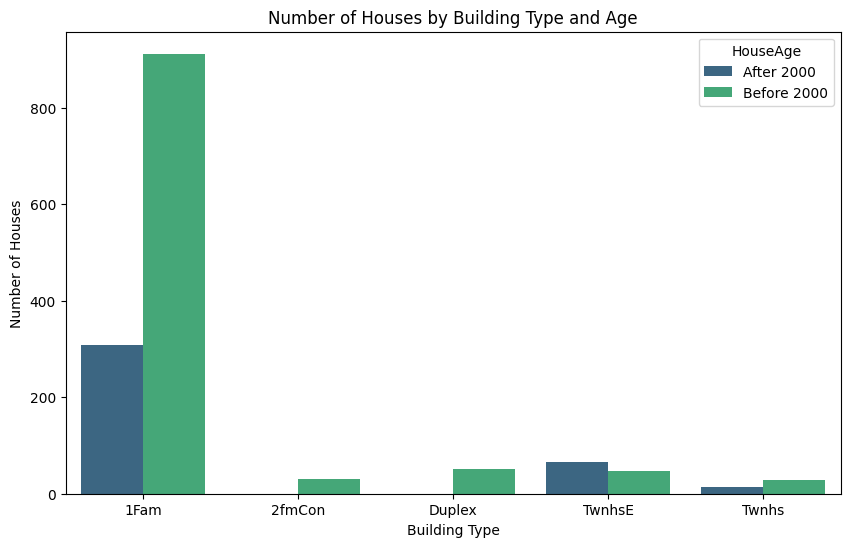

In [7]:
df['HouseAge'] = df['YearBuilt'].apply(lambda x: 'Before 2000' if x < 2000 else 'After 2000')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BldgType', hue='HouseAge', palette='viridis')
plt.title('Number of Houses by Building Type and Age')
plt.xlabel('Building Type')
plt.ylabel('Number of Houses')
plt.show()